# Superdense Coding

Podemos decir queeste término se refiere a tener dos bits clásicos en un solo qubit, aunque sabemos de antemano que colapsará en uno de los dos. Existen los nombres Alice, Bob, Eve, son nombres famosos en el cómputo cuántico que nos servirá para expresar la "comunicación del circuito".

Puedo ver esto mediante el patrón de:

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import math

In [2]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')
# Circuito de dos qubits, con diferentes rotaciones para entender que sucede dentro de la bloch sphere.
def run_simulators(circuit):
    
    #run the circuit
    statevector_job = execute(circuit, backend=statevector_simulator, shots=1024)
    result = statevector_job.result()
    # vizualitation
    statevector = result.get_statevector()
    # Es posible conocer la cantidad de qubits de un circuito así como los bits clásicos.
    num_qubits = circuit.num_qubits
    
    qrange =[q for q in range(num_qubits)] # argumentos de measure, # Creo argumentos tipo list comprehension para que en función del entero me cree otra.
    circuit.measure(qrange,qrange) 
    #__________________________________________
    qasm_job = execute(circuit, backend=qasm_simulator)
    result = qasm_job.result()
    counts = result.get_counts()

    info = {}
    info['Number of Qubits'] = num_qubits
    print(info)

    return statevector, counts

Aqui usaremos el patrón de entrelazar y superponer al principio y al final del qubit para entender el resultado de nuestras operaciones intermedias

{'Number of Qubits': 2}


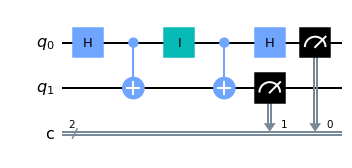

In [6]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
# Diferentes transformaciones
circuit.i(0) # Aplico la matriz identidad, no pasa nada
circuit.cx(0,1)
circuit.h(0)
statevectors, counts = run_simulators(circuit)
circuit.draw(output='mpl')


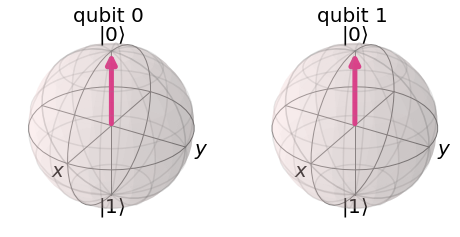

In [7]:
plot_bloch_multivector(statevectors)

{'Number of Qubits': 2}


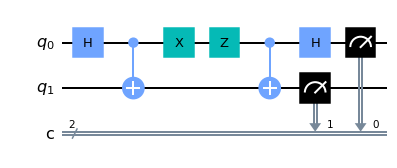

In [8]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
# Diferentes transformaciones
circuit.x(0) # Aplico la compuerta Not gate
circuit.z(0) # Aplico una rotación
circuit.cx(0,1)
circuit.h(0)
statevectors, counts = run_simulators(circuit)
circuit.draw(output='mpl')

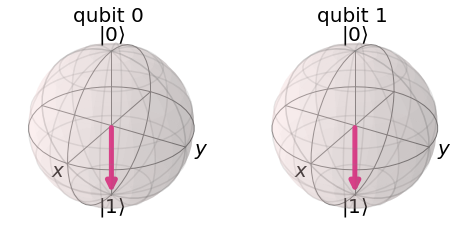

In [9]:
plot_bloch_multivector(statevectors)